In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Read and resize raw images

In [83]:
# Dictionary to store the images
images = {}
# Dictionary to store the resized images
resized_images = {}

dataset_dir = "../NHA12D_dataset"
target_width = 192
target_height = 108

# Iterate over each pavement type folder
for pavement_type in os.listdir(dataset_dir):
    pavement_type_dir = os.path.join(dataset_dir, pavement_type)
    if os.path.isdir(pavement_type_dir):
        condition  = "Raw_images"
        condition_dir = os.path.join(pavement_type_dir, condition)
        # Iterate over image files in the Raw_images folder
        for filename in os.listdir(condition_dir):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    image_path = os.path.join(condition_dir, filename)
                    image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                    
                    resized_image = cv2.resize(image, (target_width, target_height))
                    
                    if image is not None:
                        # Store the resized image in the dictionary
                        images[image_path] = image
                        # Store the resized image in the dictionary
                        resized_images[image_path] = resized_image
                    else:
                         print(f"Failed to read image: {image_path}")

PermissionError: [Errno 1] Operation not permitted: '../NHA12D_dataset'

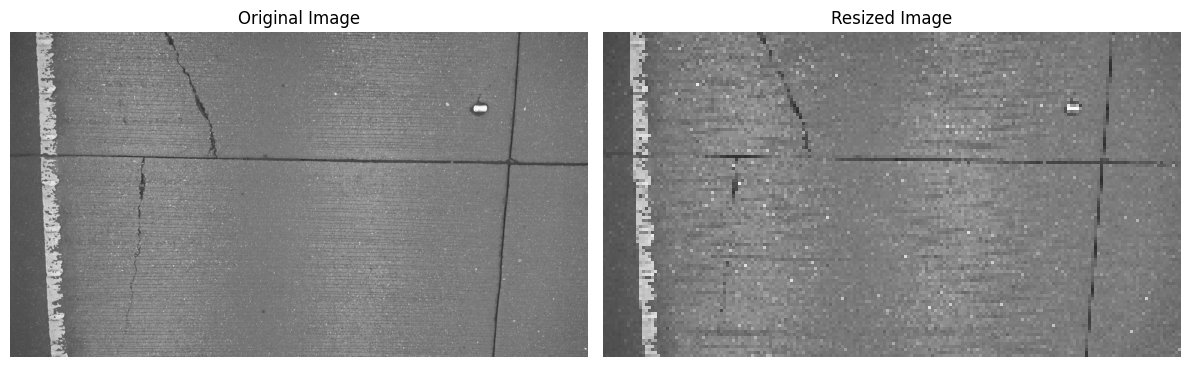

In [ ]:
# Get first item of the dictionary
image_path = next(iter(images))

# Visualize the original image and the resized image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(images[list(images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(resized_images[list(resized_images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[1].set_title("Resized Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Augment the dataset

## Rotate the images

In [ ]:
rotation_angles = [90, 180, 270]

In [ ]:
def rotate_images(images_dict):
    rotated_images = {}  # Dictionary to store augmented images
    for image_path, image in images_dict.items():
        if image is not None:
            # Augment images by rotating
            for angle in rotation_angles:
                # Rotate the image
                rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
                
                # Add the rotated image to the augmented images dictionary
                rotated_images[f"rotated_{angle}_{image_path}"] = rotated_image
    return rotated_images

In [ ]:
rotated_images = rotate_images(resized_images)

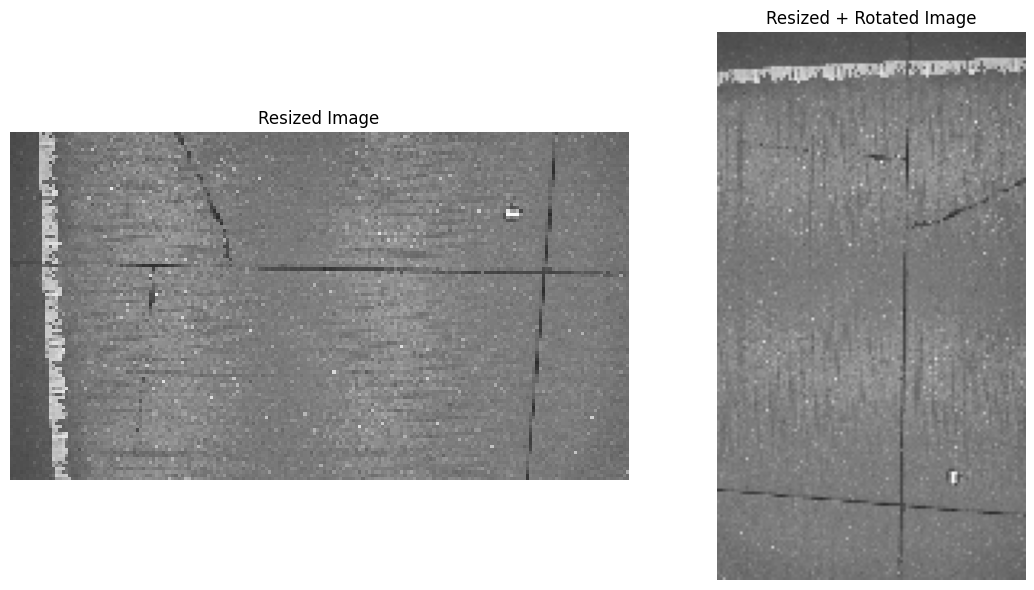

In [ ]:
# Get first item of the dictionary
image_path = next(iter(images))

# Visualize the original image and the resized image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(resized_images[list(resized_images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[0].set_title("Resized Image")
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(rotated_images[list(rotated_images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[1].set_title("Resized + Rotated Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def flip_images(images_dict):
    augmented_images = {}  # Dictionary to store augmented images
    for image_path, image in images_dict.items():
        if image is not None:
            # Flip the image horizontally
            flipped_image_horizontal = cv2.flip(image, 1)
            
            # Flip the image vertically
            flipped_image_vertical = cv2.flip(image, 0)
            
            # Flip the image both horizontally and vertically
            flipped_image_both = cv2.flip(image, -1)
            
            # Add the flipped images to the augmented images dictionary
            augmented_images[f"flipped_horizontal_{image_path}"] = flipped_image_horizontal
            augmented_images[f"flipped_vertical_{image_path}"] = flipped_image_vertical
            augmented_images[f"flipped_both_{image_path}"] = flipped_image_both
    return augmented_images

In [ ]:
# Apply flipping augmentation
flipped_images = flip_images(resized_images)

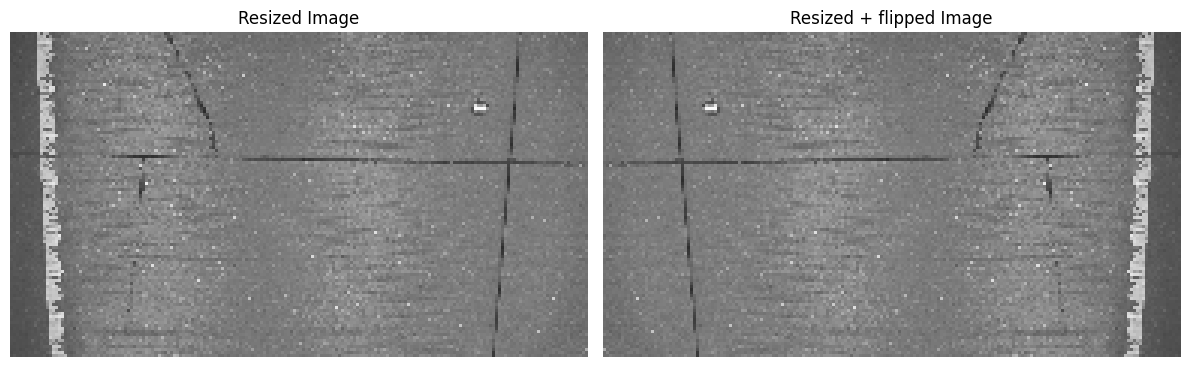

In [ ]:
# Get first item of the dictionary
image_path = next(iter(images))

# Visualize the original image and the resized image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(resized_images[list(resized_images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[0].set_title("Resized Image")
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(flipped_images[list(flipped_images.keys())[0]], cv2.COLOR_BGR2RGB))
axes[1].set_title("Resized + flipped Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Combine all augmented images

In [ ]:
# Combine all augmented images
augmented_images = {**resized_images, **rotated_images, **flipped_images}